Len current pop: 120
Len sample pop: 5

Generation at: 0
Best in generation 0: (0.6964342098835559,Solution(x=-3.3543895604193468, y=12.505961608669914, s1=-0.854389560419347, s2=0.5059616086699145))

Generation at: 1
Best in generation 1: (0.4211670047868914,Solution(x=3.207539843316494, y=2.2731962055755788, s1=0.2319031202209816, s2=-1.4804489965529668))

Generation at: 2
Best in generation 2: (0.4183872117299039,Solution(x=3.19468178117778, y=2.3174573749423883, s1=-0.12791451942892001, s2=-0.5338710603882895))

Generation at: 3
Best in generation 3: (0.4209832580528925,Solution(x=3.110420160446674, y=2.163674961445083, s1=0.49476223657217683, s2=-0.6861230038305959))

Generation at: 4
Best in generation 4: (0.4049301279368276,Solution(x=3.1439798516901796, y=2.3568971043299793, s1=0.20102237015678245, s2=0.6983308952761114))

Generation at: 5
Best in generation 5: (0.39808843263339533,Solution(x=3.1457713366380085, y=2.26091564139034, s1=0.16486708035280154, s2=-0.2958265884773277

Generation at: 52
Best in generation 52: (0.3983194244755932,Solution(x=3.135955405047758, y=2.2626822185264293, s1=0.01835091721794792, s2=0.0001543060972520126))

Generation at: 53
Best in generation 53: (0.3979445701040234,Solution(x=3.145039587376719, y=2.272724979631246, s1=0.023114777346918528, s2=-0.057388878701885256))

Generation at: 54
Best in generation 54: (0.3979311246530042,Solution(x=3.138594780998844, y=2.2765524984967627, s1=0.006749556963823898, s2=-0.021319866026642344))

Generation at: 55
Best in generation 55: (0.39795817547534185,Solution(x=3.1403868899294487, y=2.2679506668014437, s1=-0.01807432232716122, s2=-0.09980352819058197))

Generation at: 56
Best in generation 56: (0.397957159558997,Solution(x=3.1435942015051364, y=2.266328482857771, s1=0.009123711654634095, s2=0.07079549716555167))

Generation at: 57
Best in generation 57: (0.3978958632903744,Solution(x=3.140265023604272, y=2.275827713882832, s1=-0.015050200925814852, s2=-0.03719103969171978))

Generatio

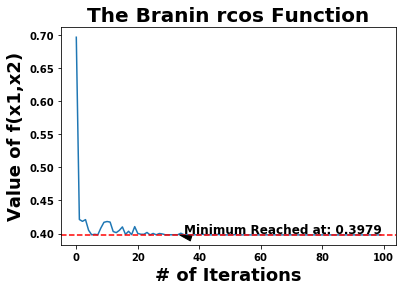

In [5]:
from math import pi, cos
import numpy as np
from matplotlib import pyplot as plt
import random as rd
import math as mt
from collections import namedtuple

def rcos(x, y):
    return (y-5.1*x**2/(4*mt.pi**2) + 5*x/mt.pi - 6)**2 + 10*(1-1/(8*mt.pi))*mt.cos(x)+10

Solution = namedtuple('Solution', 'x y s1 s2')

x_range = (-5, 10)
y_range = (0, 15)

u = 120 # Generacion de padres
L = u * 6 # Lambda: Generacion de hijos
a = 0.8 # amplitud de perturbacion
M = 100 # Stopping criteria

x_ini = 0
y_ini = 8

s1_ini = 1.25 # sigma 1
s2_ini = 1.00 # sigma 2

sol_ini = Solution(x_ini, y_ini, s1_ini, s2_ini)
best_solutions = []

obj_fun = rcos

def population(u):
    pop=[]
    for i in range(u):
        x=rd.randint(-5,10)
        y=rd.randint(0,15)
        ouch=obj_fun(x,y)
        pop.append(Solution(x,y,s1_ini,s2_ini))
    return pop

current_pop = population(u)
print(f'Len current pop: {len(current_pop)}')
sample = rd.sample(current_pop, 5)
print(f'Len sample pop: {len(sample)}')
best_childs = []
for gen in range(M):
    print()
    print(f'Generation at: {gen}')
    all_parents = []
    all_children = []
    total_good_count = 0
    for _ in range(u):
        sample = rd.sample(current_pop, 5) # n random parents
        # mezcla padres
        sol_mix = Solution(sample[1].x, sample[2].y, sample[3].s1, sample[4].s2)
        sol_prom = Solution(
            (sample[0].x+sol_mix.x)/2,
            (sample[1].y+sol_mix.y)/2,
            (sample[2].s1+sol_mix.s1)/2,
            (sample[3].s2+sol_mix.s2)/2
        )
        obj_parent = obj_fun(sol_prom.x, sol_prom.y)
        all_parents.append(Solution(sol_prom.x,sol_prom.y,s1_ini,s2_ini))
        # crea hijos para este padre
        good_count = 0 # one fifth
        for _ in range(int(L/u)):
            # Agrega perturbacion aleatoria al hijo (mutacion-ish)
            s1_mod = s1_ini * np.random.normal(0, 1)
            s2_mod = s2_ini * np.random.normal(0, 1)
            x_mod = sol_prom.x + s1_mod
            y_mod = sol_prom.y + s2_mod
            obj_child = obj_fun(x_mod, y_mod)
            if (obj_child < obj_parent):
                good_count+=1
            all_children.append(Solution(x_mod, y_mod, s1_mod, s2_mod))
        total_good_count += good_count
    best_child = min(all_children, key=lambda ch: obj_fun(ch.x, ch.y))
    best_childs.append(best_child)
    print(f'Best in generation {gen}: ({obj_fun(best_child.x, best_child.y)},{best_child})')
    success_ratio = total_good_count / L
    if gen % 10 in [0, 5]:
        if success_ratio > 1/5:
            s1_ini = s1_ini / a
            s2_ini = s2_ini / a
        elif success_ratio < 1/5:
            s1_ini = s1_ini * a
            s2_ini = s2_ini * a
        else:
            pass
    # All the parents and all the genrated children
    sorted_parents = sorted(all_parents, key=lambda p: obj_fun(p.x, p.y))
    sorted_children = sorted(all_children, key=lambda ch: obj_fun(ch.x, ch.y))
    # Take 10% of parents and 90% of children for next generation
    current_pop = sorted_parents[:int(u*(10/100))] + sorted_children[:int(u*(90/100))]
    np.random.shuffle(current_pop)
Gen, bestest_child = min(enumerate(best_childs), key=lambda ch: obj_fun(ch[1].x, ch[1].y))
bestest_val = obj_fun(bestest_child.x, bestest_child.y)
print(f"Final_Best: {bestest_child}")
print(f"The Lowest Value is: {obj_fun(bestest_child.x, bestest_child.y)}")
# plot the stuff
plt.plot([obj_fun(ch.x, ch.y) for ch in best_childs])
plt.axhline(y=bestest_val,color="r",linestyle='--')
plt.title("The Branin rcos Function",fontsize=20,fontweight='bold')
plt.xlabel("# of Iterations",fontsize=18,fontweight='bold')
plt.ylabel("Value of f(x1,x2)",fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
xyz=(Gen/2.5, bestest_val)
xyzz = (Gen/2.4, bestest_val+0.0025)
plt.annotate("Minimum Reached at: %.4f" % bestest_val, xy=xyz, xytext=xyzz,
             arrowprops=dict(facecolor='black', shrink=0.001,width=1,headwidth=5),
             fontsize=12,fontweight='bold')
plt.show()

In [28]:
# fun with random numbers with normal distribution
cnt = 0
gr = 3.5
val = 0
while val < gr:
    val = np.random.normal(0, 1)
    cnt += 1
print(f'tries: {cnt}')

tries: 3535
